# **Classification of COVID-19 X_Rays and Detection of regions of interest by providing feature maps.**

Coronavirus disease (Covid-19) is an irresistible infection caused by a newfound virus. This pandemic has outspread all across the earth. Testing for Coronavirus has been not able to stay aware of the interest as the quantity of cases are expanding day by day. The most generally utilized Coronavirus detection procedure is real-time polymerase chain reaction (RT-PCR). Because of less affectability of RT-PCR, it gives high false negative outcomes. So identifying conceivable Coronavirus diseases by radiological imaging methods, for example, chest X-rays and computed tomography (CT) can give better outcomes in the event of crucial and critical cases and may help isolate high risk patients while test results are anticipated. 
Coronavirus uncovers some radiological marks that can be effortlessly recognized through chest X-rays. For this, radiologists are needed to examine these marks. Significant findings in this condition include expanded whiteness of the lungs, corresponding to the seriousness of the infection. As the condition becomes more severe, these markings become invisible, or ‘whited-out’. Although, it is a  time-consuming and error-prone task. Therefore, we need to automate the diagnosis of chest X-rays.
So we are trying to create an automated deep learning model to classify chest X-rays which may quicken the analysis time and would detect the right regions of covid in the chest X-rays more accurately. 

**OBJECTIVE:** The goal of the project is to classify Covid19 X-rays and detection of right regions of interest by providing the feature maps using an automated deep learning model. 


Importing all the necessary libraries.

In [ ]:
import numpy as np
import cv2
from google.colab import drive
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.models import Model
from tensorflow.python.keras.optimizer_v2.adam import Adam
from keras.layers import Lambda, Concatenate
import tensorflow as tf

Uploading dataset from my google drive.

In [ ]:
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive/


**About the dataset:**

For the purpose of the experiments, I have searched and accessed several sources of X-rays image datasets. I found this dataset which contains Covid and Non-Covid patient cases of both X-ray and CT images. The dataset contains two folders, one for the X-ray images, which includes two separate sub-folders for 5500 non-covid images and 4044 covid images. The other folders contains the CT images. It includes two separate sub-folders of 2628 non-covid images and 5427 covid images. But I will be using only X-ray images for evaluation of my deep learning model in my project.



Defining the path for only COVID-19 X-rays in my dataset from google drive.

In [ ]:
path = '/content/drive/My Drive/DATA606/DATASET_1_X-rays/COVID'

In [ ]:
covid_data = os.listdir(path)

The dataset I am dealing with is an image dataset. So a important part of preprocessing is resizing the images. Essentially all machine learning models train quicker on smaller images. Also most of the deep learning model architectures necessitate that all images to be in similar size. Resizing images to a standard size that is smaller in pixels gives better results and save time while training the model. whereas if we resize all images from smaller to larger pixels, all small image pixels are stretched and this can uncertain our model ability to learn key features like object boundaries, etc. So I have resized all images in the entire dataset to 150*150, converted to three channels. Here first I am reshaping the COVID X-ray images. 


In [ ]:
covid_data1 = []

for i in range(1000):
  a = cv2.imread(path + '/' + covid_data[i])
  a = cv2.resize(a,(150,150))
  covid_data1.append(a)

covid_data1 = np.array(covid_data1)

Defining the path for only NON COVID-19 X-rays in my dataset from google drive.

In [ ]:
path1 = '/content/drive/My Drive/DATA606/DATASET_1_X-rays/Non-COVID'

In [ ]:
non_covid_data = os.listdir(path1)

Here, I am also reshaping the NON- COVID X-ray images in the entire dataset to 150*150, converted to three channels.

In [ ]:
non_covid_data1 = []

for i in range(1000):
  a = cv2.imread(path1 + '/' + non_covid_data[i])
  a = cv2.resize(a,(150,150))
  non_covid_data1.append(a)

non_covid_data1 = np.array(non_covid_data1)

We can see that the images are reshaped to 150*150,3.

In [ ]:
covid_data1.shape

(1000, 150, 150, 3)

In [ ]:
non_covid_data1.shape

(1000, 150, 150, 3)

Here I am concatenating both the covid and non-covid X-ray images to a numpy array.

In [ ]:
data = np.concatenate((covid_data1,non_covid_data1),axis=0)

Defining the labels for the images in 1's and 0's.

In [ ]:
labels_0 = np.zeros(1000) 
labels_1 = np.ones(1000) 

All the Covid X-ray images are labelled with 1's and Non-Covid X-ray images with 0's.

In [ ]:
labels = np.concatenate((labels_1,labels_0),axis=0)

Here, I am preparing data to train my model by making a list with images and their coressponding labels.

In [ ]:
mixed = []

for i in range(len(data)):
  mixed.append([data[i],labels[i]])
mixed = np.array(mixed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [ ]:
np.random.shuffle(mixed)

From my entire data, I am using 70% of it to train my models.

In [ ]:
X_train = []
y_train = []

for i in range(700):
  X_train.append(mixed[i][0])
  y_train.append(mixed[i][1])

X_train = np.array(X_train)
y_train = np.array(y_train)


I am using 10% of it for my validation.

In [ ]:
X_val = []
y_val = []

for i in range(700,800):
  X_val.append(mixed[i][0])
  y_val.append(mixed[i][1])

X_val = np.array(X_val)
y_val = np.array(y_val)


Remaining 20% of it to test.

In [ ]:
X_test = []
y_test = []

for i in range(800,1000):
  X_test.append(mixed[i][0])
  y_test.append(mixed[i][1])

X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
img_width = 150
img_height = 150
input_shape = (img_width, img_height, 3)

Implementing a model train on our dataset.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Training the model for a fixed number of epochs that is 10.

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 17s 19ms/step - loss: 238.3268 - accuracy: 0.5444
Epoch 2/10
22/22 [==============================] - 0s 11ms/step - loss: 0.6556 - accuracy: 0.6320
Epoch 3/10
22/22 [==============================] - 0s 11ms/step - loss: 2.9470 - accuracy: 0.6743
Epoch 4/10
22/22 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.5507
Epoch 5/10
22/22 [==============================] - 0s 11ms/step - loss: 0.8439 - accuracy: 0.5969
Epoch 6/10
22/22 [==============================] - 0s 11ms/step - loss: 1.6796 - accuracy: 0.6528
Epoch 7/10
22/22 [==============================] - 0s 11ms/step - loss: 0.7193 - accuracy: 0.6932
Epoch 8/10
22/22 [==============================] - 0s 11ms/step - loss: 1.3558 - accuracy: 0.6452
Epoch 9/10
22/22 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.7345
Epoch 10/10
22/22 [==============================] - 0s 11ms/step - loss: 0.5437 - accuracy: 0.7443


We are predicting the test accuracy of the our model.

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test.shape

(200,)

In [ ]:
y_test1 = np.reshape(y_test,(y_test.shape[0],1))

In [ ]:
y_test1.shape

(200, 1)

Here I am checking if the value of my prediction is greater than 0.5. If it is greater than 0.5, it is covid and appending 1 to my final prediction.If it is below 0.5, it is non-covid so appending 0 to my final prediction. Finally making my final prediction in 1's and 0's.  

In [ ]:
final_pred = []
for i in range(len(pred)):
  if pred[i][0]>=0.5:
    final_pred.append(1)
  else:
    final_pred.append(0)

final_pred = np.array(final_pred)

Here checking if my final prediction and my test outputs are same. After checking it I am diving the total number of matches divided by length of my test and whole multiplied with 100 to get percentage. I got a test accuracy of 82%.

In [ ]:
count = 0
for i in range(len(final_pred)):
  if final_pred[i]==y_test1[i][0]:
    count+=1

accuracy = (count/len(y_test1)) * 100

print(accuracy)

82.0


As the accuracy of the model is not convincing, I am trying to implement it on different models for better results.

# VGG19 Model

It is very deep convolutional network for large-scale image recognition. VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). So in easy terms, VGG is a deep CNN used to classify images. When we give a image as an input to this network, it shapes the matrix to 224,224,3. When we use kernels with 3*3 size with a stride size of pixel 1, this will help to cover the whole idea of the image. Spatial padding was utilized to safeguard the spatial resolution of the image. Max pooling was performed over a 2 * 2 pixel windows with stride 2. Then this is followed by an activation layer, Rectified linear unit(ReLu). This helps the model classify better as it initiate non-linearity. Also it improves computational time. Then three fully connected layers are implemented in which two are of size 4096 and after that with a layer 1000 channels. And the final layer is a softmax function.








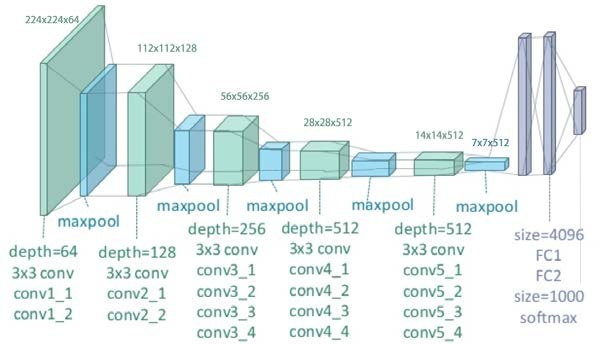

In [ ]:
def vgg19(input_shape):

    input = Input(shape=(input_shape))

    v = Conv2D(64, 3, padding="same", activation="relu", input_shape=input_shape)(input)
    v = Conv2D(64, 3, padding="same", activation="relu")(v)
    v = MaxPooling2D()(v)

    v = Conv2D(128, 3, padding="same", activation="relu")(v)
    v = Conv2D(128, 3, padding="same", activation="relu")(v)
    v = MaxPooling2D()(v)
    
    v = Conv2D(256, 3, padding="same", activation="relu")(v)
    v = Conv2D(256, 3, padding="same", activation="relu")(v)
    v = Conv2D(256, 3, padding="same", activation="relu")(v)
    v = Conv2D(256, 3, padding="same", activation="relu")(v)
    v = MaxPooling2D()(v)
    
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = MaxPooling2D()(v)
        
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = Conv2D(512, 3, padding="same", activation="relu")(v)
    v = MaxPooling2D()(v)
    
    v = Flatten()(v)
    v = Dense(4096, activation="relu")(v)
    v = Dense(4096, activation="relu")(v)
    output = Dense(1, activation="sigmoid")(v)
        
    return Model(input, output, name="classifier")

This trains the model and the classifier gives us the summary of the model in each layer and there correspoding output shapes and parameters.

In [ ]:
classifier = vgg19(X_train.shape[1:])
opt = Adam(lr=0.00001, beta_1=0.5)

classifier.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 128)       0

Training the model for a fixed number of epochs that is 10.

In [ ]:
classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
22/22 [==============================] - 7s 169ms/step - loss: 0.6875 - accuracy: 0.5332
Epoch 2/10
22/22 [==============================] - 2s 85ms/step - loss: 0.6164 - accuracy: 0.6416
Epoch 3/10
22/22 [==============================] - 2s 85ms/step - loss: 0.5310 - accuracy: 0.7264
Epoch 4/10
22/22 [==============================] - 2s 84ms/step - loss: 0.4902 - accuracy: 0.7748
Epoch 5/10
22/22 [==============================] - 2s 84ms/step - loss: 0.4712 - accuracy: 0.7730
Epoch 6/10
22/22 [==============================] - 2s 85ms/step - loss: 0.4354 - accuracy: 0.8265
Epoch 7/10
22/22 [==============================] - 2s 85ms/step - loss: 0.4146 - accuracy: 0.8097
Epoch 8/10
22/22 [==============================] - 2s 84ms/step - loss: 0.3877 - accuracy: 0.8115
Epoch 9/10
22/22 [==============================] - 2s 85ms/step - loss: 0.3511 - accuracy: 0.8507
Epoch 10/10
22/22 [==============================] - 2s 85ms/step - loss: 0.3421 - accuracy: 0.8628


Here we are evaluating the whole model train loss and accuracy as well as test loss and accuracy.

In [ ]:
train_loss, train_acc = classifier.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = classifier.evaluate(X_test, y_test, verbose=2)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_acc)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

22/22 - 1s - loss: 0.3451 - accuracy: 0.8443
7/7 - 1s - loss: 0.3042 - accuracy: 0.8850
Train Loss: 0.345140665769577
Train Accuracy: 0.8442857265472412
Test Loss: 0.3041626811027527
Test Accuracy: 0.8849999904632568


Now we are trying to predict the feature map of our model by which we can see the main regions and detect the affected covid areas in the covid chest X-ray images.

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
model = Model(inputs=classifier.inputs, outputs=classifier.layers[4].output)

In [ ]:
classifier.layers

We need a clearer idea of the shape of the feature maps output by each of the convolutional layers and the layer index number so that we can retrieve the appropriate layer output.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       73856     
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_________________________________________________________________


**Feature maps:** Feature maps are also called as activation maps as they capture the result of applying the filters to input, such as the input image or another feature map. The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small detail, whereas feature maps close to the output of the model capture more general features.

We are now ready to get the feature map. We can do this easy by calling the model.predict() function and passing in the prepared single image.

In [ ]:
feature_maps = model.predict(X_test)

Here, this helps us to know in which place of the array the covid X-rays are present and visualize them as a feature map. If the output of the y_test[number] is 0, it means it is a non-covid X-ray image and if the output is 1, then it is covid X-ray image. This is because intially while preparing data to train my model we defined the labels for all the X-ray images in our dataset to either 1's and 0's by making a list with images and their coressponding labels. All the Covid X-ray images are labelled with 1's and Non-Covid X-ray images with 0's.


In [ ]:
y_test[5]

0.0

As We know the result will be a feature map and we can plot all 36 two-dimensional images as an 6x6 square of images. Depending on the image location that is covid-19 X-ray, the same value is given as a paramter to plot the feature map.

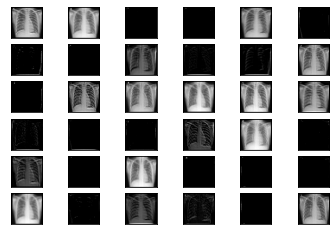

In [ ]:
square = 6
i = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, i)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[5, :, :, i-1], cmap='gray')
		i += 1

plt.show()

**In the above feature map, significant findings in the Covid-19 X-ray include expanded whiteness of the lungs, corresponding to the seriousness of the infection. As the condition becomes more severe, these markings become invisible, or ‘whited-out’.**


# Alexnet Model

AlexNet can likewise be attributed with bringing deep learning to adjoining fields such as medical image analysis and natural language processing. AlexNet is one of the convolutional neural network architecture that does well on image classification. The architecture consists of eight layers: the first five were convolutional layers, some of them followed by max-pooling layers and the last three were fully connected layers. It uses the non-saturating ReLU activation function, which showed improved training performance. But this isn’t what makes AlexNet special, there are some of the features used that are new approaches to convolutional neural networks like ReLU Nonlinearity, Multiple GPUs, Overlapping Pooling. VGG, while compared to AlexNet, has a few differences that separates it from other competing models: instead of utilizing large receptive fields like AlexNet (11x11 with a step of 4), VGG utilizes exceptionally small receptive fields (3x3 with a step of 1).














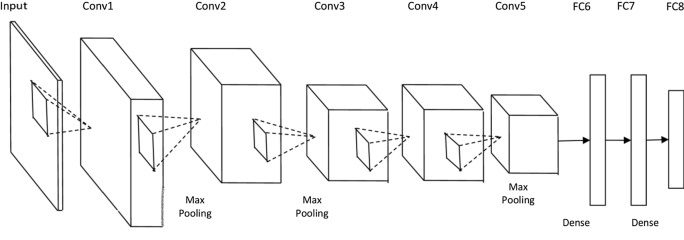

In [ ]:
maps = 0
def alexnet(input_shape):
  global maps
  input = Input(shape=(input_shape))

  # layer 1
  n = Conv2D(48, 11, strides=4, padding="same", activation="relu", input_shape=input_shape)(input)
  m = Conv2D(48, 11, strides=4, padding="same", activation="relu", input_shape=input_shape)(input)
  n = Lambda(tf.nn.local_response_normalization)(n)
  m = Lambda(tf.nn.local_response_normalization)(m)
  n = MaxPooling2D(pool_size=3, strides=2)(n)
  m = MaxPooling2D(pool_size=3, strides=2)(m)
    
  # layer 2
  n = Conv2D(128, 5, padding="same", activation="relu")(n)
  m = Conv2D(128, 5, padding="same", activation="relu")(m)
  n = Lambda(tf.nn.local_response_normalization)(n)
  m = Lambda(tf.nn.local_response_normalization)(m)
  n = MaxPooling2D(pool_size=3, strides=2)(n)
  m = MaxPooling2D(pool_size=3, strides=2)(m)
    
  # layer 3
  both = Concatenate(axis=3)([n, m])
  n = Conv2D(192, 5, padding="same", activation="relu")(both)
  m = Conv2D(192, 5, padding="same", activation="relu")(both)
    
  # layer 4
  n = Conv2D(192, 5, padding="same", activation="relu")(n)
  m = Conv2D(192, 5, padding="same", activation="relu")(m)
    
  # layer 5
  n = Conv2D(192, 5, padding="same", activation="relu")(n)
  m = Conv2D(192, 5, padding="same", activation="relu")(m)
  n = MaxPooling2D()(n)
  m = MaxPooling2D()(m)
    
  both = Concatenate(axis=3)([n, m])
  both = Flatten()(both)
  both = Dense(4096, activation="relu")(both)
  both = Dense(4096, activation="relu")(both)
  output = Dense(1, activation="sigmoid")(both)
  maps = both     
  
  return Model(input, output, name="classifier")

This trains the model and the classifier gives us the summary of the model in each layer and there correspoding output shapes and parameters.

In [ ]:
classifier = alexnet(X_train.shape[1:])
opt = Adam(lr=0.00001, beta_1=0.5)

classifier.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
classifier.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 38, 38, 48)   17472       input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 38, 38, 48)   17472       input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 38, 38, 48)   0           conv2d_19[0][0]                  
_________________________________________________________________________________________

Training the model for a fixed number of epochs that is 20.

In [ ]:
classifier.fit(X_train, y_train, epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 25ms/step - loss: 0.6935 - accuracy: 0.5452
Epoch 2/20
22/22 [==============================] - 0s 19ms/step - loss: 0.6772 - accuracy: 0.5900
Epoch 3/20
22/22 [==============================] - 0s 19ms/step - loss: 0.6500 - accuracy: 0.6518
Epoch 4/20
22/22 [==============================] - 0s 20ms/step - loss: 0.6027 - accuracy: 0.7197
Epoch 5/20
22/22 [==============================] - 0s 20ms/step - loss: 0.5303 - accuracy: 0.7617
Epoch 6/20
22/22 [==============================] - 0s 19ms/step - loss: 0.4626 - accuracy: 0.8084
Epoch 7/20
22/22 [==============================] - 0s 20ms/step - loss: 0.4439 - accuracy: 0.7917
Epoch 8/20
22/22 [==============================] - 0s 19ms/step - loss: 0.3836 - accuracy: 0.8474
Epoch 9/20
22/22 [==============================] - 0s 19ms/step - loss: 0.3639 - accuracy: 0.8300
Epoch 10/20
22/22 [==============================] - 0s 19ms/step - loss: 0.3316 - accuracy: 0.8524
Epoch 11/

Here we are evaluating the whole model train loss and accuracy as well as test loss and accuracy.

In [ ]:
train_loss, train_acc = classifier.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = classifier.evaluate(X_test, y_test, verbose=2)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_acc)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

22/22 - 0s - loss: 0.1049 - accuracy: 0.9686
7/7 - 0s - loss: 0.2785 - accuracy: 0.9000
Train Loss: 0.1048506498336792
Train Accuracy: 0.9685714244842529
Test Loss: 0.2784764766693115
Test Accuracy: 0.8999999761581421


Now we are trying to predict the feature map of our model by which we can see the main regions and detect the affected covid areas in the covid chest X-ray images.

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
model = Model(inputs=classifier.inputs, outputs=classifier.layers[4].output)

In [ ]:
classifier.layers

We need a clearer idea of the shape of the feature maps output by each of the convolutional layers and the layer index number so that we can retrieve the appropriate layer output.

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 38, 38, 48)        17472     
_________________________________________________________________
lambda_1 (Lambda)            (None, 38, 38, 48)        0         
Total params: 17,472
Trainable params: 17,472
Non-trainable params: 0
_________________________________________________________________


We are now ready to get the feature map. We can do this easy by calling the model.predict() function and passing in the prepared single image.

In [ ]:
feature_maps = model.predict(X_test)

Here, this helps us to know in which place of the array the covid X-rays are present and visualize them as a feature map. If the output of the y_test[number] is 0, it means it is a non-covid X-ray image and if the output is 1, then it is covid X-ray image. This is because intially while preparing data to train my model we defined the labels for all the X-ray images in our dataset to either 1's and 0's by making a list with images and their coressponding labels. All the Covid X-ray images are labelled with 1's and Non-Covid X-ray images with 0's.


In [ ]:
y_test[4]

1.0

As We know the result will be a feature map and we can plot all 36 two-dimensional images as an 6x6 square of images. Depending on the image location that is covid-19 X-ray, the same value is given as a paramter to plot the feature map.

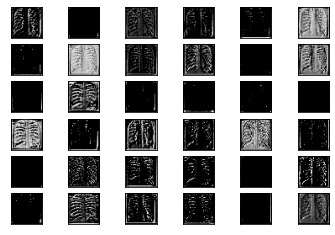

In [ ]:
square = 6
i = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, i)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[4, :, :, i-1], cmap='gray')
		i += 1

plt.show()

**In the above feature map, significant findings in the Covid-19 X-ray include expanded whiteness of the lungs, corresponding to the seriousness of the infection. As the condition becomes more severe, these markings become invisible, or ‘whited-out’.**


### As we got better accuracy in the Alexnet model, we can conclude by saying that the feature map of Alexnet is much more specific and clear to understand the main features of COVID affected regions on the chest X-rays.